# **取得Kaggle上的資料集**

In [2]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


mv: cannot stat 'kaggle.json': No such file or directory


# **連接kaggle個人帳戶API**

In [4]:
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d uysalserkan/fault-induction-motor-dataset

fault-induction-motor-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip fault-induction-motor-dataset.zip

Archive:  fault-induction-motor-dataset.zip
replace imbalance/imbalance/10g/13.9264.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: imbalance/imbalance/10g/13.9264.csv  
replace imbalance/imbalance/10g/14.5408.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: imbalance/imbalance/10g/14.5408.csv  
  inflating: imbalance/imbalance/10g/15.7696.csv  
  inflating: imbalance/imbalance/10g/16.5888.csv  
  inflating: imbalance/imbalance/10g/17.2032.csv  
  inflating: imbalance/imbalance/10g/18.2272.csv  
  inflating: imbalance/imbalance/10g/19.2512.csv  
  inflating: imbalance/imbalance/10g/20.48.csv  
  inflating: imbalance/imbalance/10g/21.7088.csv  
  inflating: imbalance/imbalance/10g/22.1184.csv  
  inflating: imbalance/imbalance/10g/22.9376.csv  
  inflating: imbalance/imbalance/10g/24.7808.csv  
  inflating: imbalance/imbalance/10g/25.6.csv  
  inflating: imbalance/imbalance/10g/26.0096.csv  
  inflating: imbalance/imbalance/10g/27.648.csv  
  inflating: imbalance/imba

# **Prepare data**

In [1]:
import numpy as np
import pandas as pd
import glob 

In [2]:
cur_path = "/content/imbalance"

In [3]:
normal_file_names = glob.glob("/content/normal"+'/normal/*.csv')
imnormal_file_names_6g = glob.glob(cur_path+'/imbalance/6g/*.csv')
imnormal_file_names_10g = glob.glob(cur_path+'/imbalance/10g/*.csv')
imnormal_file_names_15g = glob.glob(cur_path+'/imbalance/15g/*.csv')
imnormal_file_names_20g = glob.glob(cur_path+'/imbalance/20g/*.csv')
imnormal_file_names_25g = glob.glob(cur_path+'/imbalance/25g/*.csv')
imnormal_file_names_30g = glob.glob(cur_path+'/imbalance/30g/*.csv')

In [4]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [23]:
data_n = dataReader(normal_file_names)
data_6g = dataReader(imnormal_file_names_6g)
data_10g = dataReader(imnormal_file_names_10g)
data_15g = dataReader(imnormal_file_names_15g)
data_20g = dataReader(imnormal_file_names_20g)
data_25g = dataReader(imnormal_file_names_25g)
data_30g = dataReader(imnormal_file_names_30g)

In [24]:
print(len(data_n),len(data_6g),len(data_10g),len(data_15g),len(data_20g),len(data_25g),len(data_30g))

12250000 12250000 12000000 12000000 12250000 11750000 11750000


## **Down Sampling**

In [25]:
def downSampler(data,a,b):
    """
    data = data
    a = start index
    b = sampling rate
    """
    data_decreased = pd.DataFrame()
    x = b
    for i in range(int(len(data)/x)):
        current_result = pd.DataFrame(data.iloc[a:b, :].sum() / x).T
        data_decreased = pd.concat([data_decreased, current_result], ignore_index=True)
        a += x
        b += x
    return data_decreased

In [26]:
data_n = downSampler(data_n, 0, 5000)
data_6g = downSampler(data_6g, 0, 5000)
data_10g = downSampler(data_10g, 0, 5000)
data_15g = downSampler(data_15g, 0, 5000)
data_20g = downSampler(data_20g, 0, 5000)
data_25g = downSampler(data_25g, 0, 5000)
data_30g = downSampler(data_30g, 0, 5000)

In [27]:
print(len(data_n),len(data_6g),len(data_10g),len(data_15g),len(data_20g),len(data_25g),len(data_30g))

2450 2450 2400 2400 2450 2350 2350


## **FFT Convolve**

In [28]:
from scipy import signal
def FFT(data):
    autocorr = signal.fftconvolve(data,data[::-1],mode='full')
    return pd.DataFrame(autocorr)

In [29]:
data_n = FFT(data_n)
data_6g = FFT(data_6g)
data_10g = FFT(data_10g)
data_15g = FFT(data_15g)
data_20g = FFT(data_20g)
data_25g = FFT(data_25g)
data_30g = FFT(data_30g)

In [30]:
print(len(data_n),len(data_6g),len(data_10g),len(data_15g),len(data_20g),len(data_25g),len(data_30g))

4899 4899 4799 4799 4899 4699 4699


## **Concat all the data**

In [31]:
y_1 = pd.DataFrame(np.ones(int(len(data_n)),dtype=int)) #其實應該先寫zeros,影響不大就沒改了
y_2 = pd.DataFrame(np.zeros(int(len(data_6g)),dtype=int))
y_3 = pd.DataFrame(np.full((int(len(data_10g)),1),2))
y_4 = pd.DataFrame(np.full((int(len(data_15g)),1),3))
y_5 = pd.DataFrame(np.full((int(len(data_20g)),1),4))
y_6 = pd.DataFrame(np.full((int(len(data_25g)),1),5))
y_7 = pd.DataFrame(np.full((int(len(data_30g)),1),6))
y = pd.concat([y_1,y_2,y_3,y_4,y_5,y_6,y_7], ignore_index=True)
y = y.values.ravel()
y.shape

(33693,)

In [32]:
data = pd.concat([data_n,data_6g,data_10g,data_15g,data_20g,data_25g,data_30g],ignore_index=True)
data.shape

(33693, 15)

## **SVM Machine learning**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

test size percentage 10
test size percentage 20
test size percentage 30
test size percentage 40
test size percentage 50
test size percentage 60
test size percentage 70
test size percentage 80
test size percentage 90


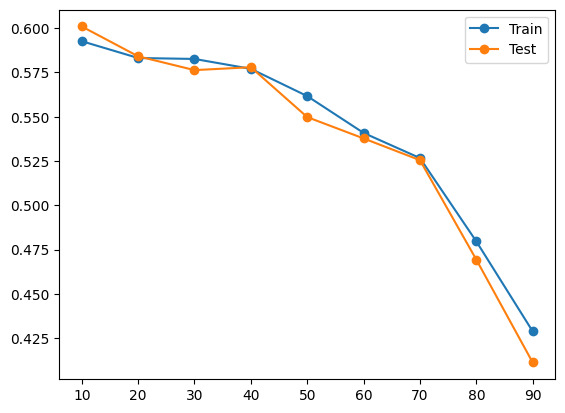

Best Classification is 10% of test data and 90% of train data:
Best Classification has 0.6008902077151336 of accuracy:


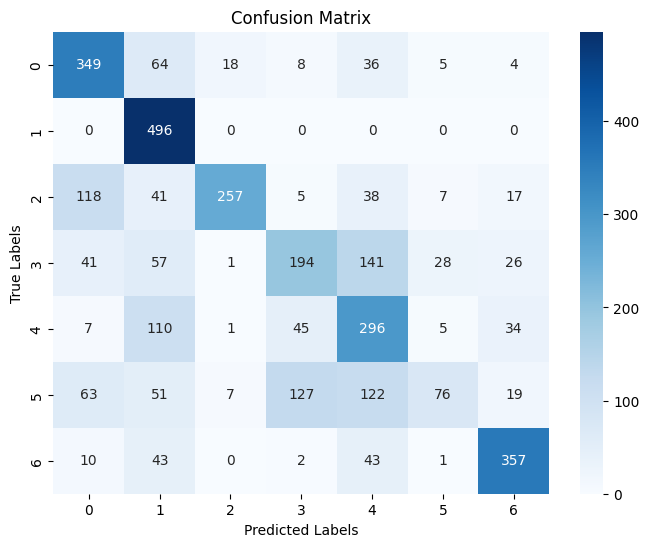

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.72      0.65       484
           1       0.58      1.00      0.73       496
           2       0.90      0.53      0.67       483
           3       0.51      0.40      0.45       488
           4       0.44      0.59      0.50       498
           5       0.62      0.16      0.26       465
           6       0.78      0.78      0.78       456

    accuracy                           0.60      3370
   macro avg       0.63      0.60      0.58      3370
weighted avg       0.63      0.60      0.58      3370



In [34]:
ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
best_accuracy = 0
best_split = 0

train_scores = []
test_scores = []
for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=i/100, shuffle=True)
    svm = SVC(random_state = 1)
    svm.fit(X_train,y_train)
    print("test size percentage %d" % (i))
    train_accuracy = svm.score(X_train, y_train)
    test_accuracy = svm.score(X_test, y_test)
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    
#     print("SVM accuracy is {} on Train Dataset".format(train_accuracy))
#     print("SVM accuracy is {} on Test Dataset".format(test_accuracy))
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_split = i
        
        # Make predictions on the test set
        y_pred = svm.predict(X_test)
        
        # Create classification report
        cr = classification_report(y_test, y_pred)
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)

plt.plot(ratiovalues, train_scores, '-o', label='Train')
plt.plot(ratiovalues, test_scores, '-o', label='Test')
plt.legend()
plt.show()

print("Best Classification is {}% of test data and {}% of train data:".format(best_split,100-best_split))
print("Best Classification has {} of accuracy:".format(best_accuracy))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report:\n", cr)

## **XGboost Machine learning**

test size percentage 10
test size percentage 20
test size percentage 30
test size percentage 40
test size percentage 50
test size percentage 60
test size percentage 70
test size percentage 80
test size percentage 90


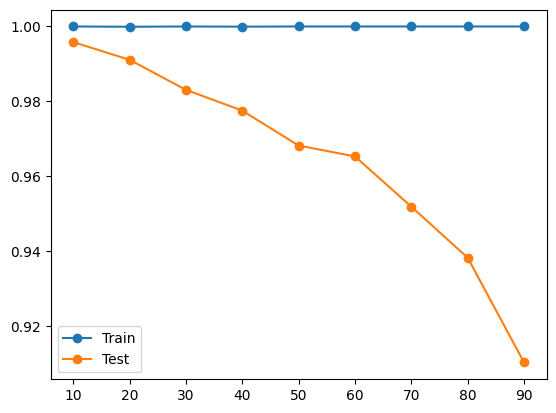

Best Classification is 10% of test data and 90% of train data:
Best Classification has 0.9958456973293769 of accuracy:


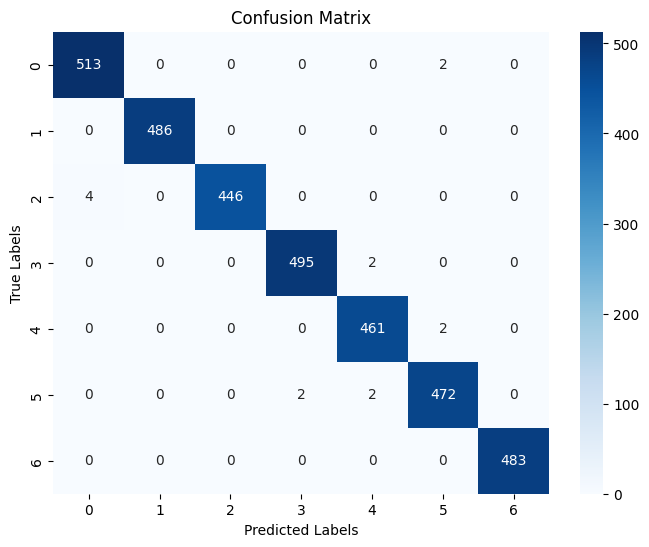

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       515
           1       1.00      1.00      1.00       486
           2       1.00      0.99      1.00       450
           3       1.00      1.00      1.00       497
           4       0.99      1.00      0.99       463
           5       0.99      0.99      0.99       476
           6       1.00      1.00      1.00       483

    accuracy                           1.00      3370
   macro avg       1.00      1.00      1.00      3370
weighted avg       1.00      1.00      1.00      3370



In [35]:
from xgboost import XGBClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
best_accuracy_xgboost = []
best_accuracy = 0
best_split = 0

train_scores = []
test_scores = []
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3, eval_metric='mlogloss')
# 使用訓練資料訓練模型


for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=i/100, shuffle=True)
    xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3, eval_metric='mlogloss')
    xgboostModel.fit(X_train, y_train)
    # 使用訓練資料預測分類
    print("test size percentage %d" % (i))
    train_accuracy = xgboostModel.score(X_train, y_train)
    test_accuracy = xgboostModel.score(X_test, y_test)
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)
    
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_split = i
        
        # Make predictions on the test set
        y_pred = predicted = xgboostModel.predict(X_test)

        
        # Create classification report
        cr = classification_report(y_test, y_pred)
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)

plt.plot(ratiovalues, train_scores, '-o', label='Train')
plt.plot(ratiovalues, test_scores, '-o', label='Test')
plt.legend()
plt.show()

print("Best Classification is {}% of test data and {}% of train data:".format(best_split,100-best_split))
print("Best Classification has {} of accuracy:".format(best_accuracy))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report:\n", cr)




# xgboostModel.fit(X_train, y_train.values.ravel())
# # 使用訓練資料預測分類
# predicted = xgboostModel.predict(X_train)

# print('訓練集: ',xgboostModel.score(X_train,y_train.values.ravel()))
# print('測試集: ',xgboostModel.score(X_test,y_test.values.ravel()))

## **KNN machine learning**

**Best ratio for different K**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

The Best Classification in 1NN is 10% of test data and 90% of train data,and the accuracy is 0.9483679525222551
The Best Classification in 2NN is 10% of test data and 90% of train data,and the accuracy is 0.7222551928783383
The Best Classification in 3NN is 30% of test data and 70% of train data,and the accuracy is 0.6160466956865849
The Best Classification in 4NN is 10% of test data and 90% of train data,and the accuracy is 0.6270029673590505
The Best Classification in 5NN is 10% of test data and 90% of train data,and the accuracy is 0.6759643916913947
The Best Classification in 6NN is 10% of test data and 90% of train data,and the accuracy is 0.6632047477744807
The Best Classification in 7NN is 20% of test data and 80% of train data,and the accuracy is 0.6523223030123164
The Best Classification in 8NN is 10% of test data and 90% of train data,and the accuracy is 0.6302670623145401


The Best Classification in 9NN is 10% of test data and 90% of train data,and the accuracy is 0.6412462908011869


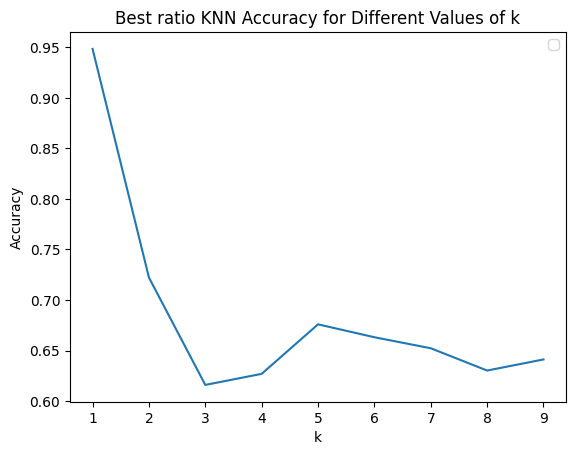

In [37]:
ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]

# train_accuracies = []
# test_accuracies = []
k_values = range(1, 10)  # Vary the value of k from 1 to 9
best_accuracy_differentK = []

for k in k_values:
#     print("k={}NN".format(k))
    best_accuracy = 0
    best_split = 0
    train_scores = []
    test_scores = []
    for i in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=i/100, shuffle=True)
        knn = KNeighborsClassifier(n_neighbors = k) #n_neighbors = k
        knn.fit(X_train,y_train)

#         print("test size percentage %d" % (i))
        train_accuracy = knn.score(X_train, y_train)
        test_accuracy = knn.score(X_test, y_test)
        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

#         print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
#         print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_split = i

            # Make predictions on the test set
            y_pred = knn.predict(X_test)

            # Create classification report
            cr = classification_report(y_test, y_pred)
            # Create confusion matrix
            cm = confusion_matrix(y_test, y_pred)
    print("The Best Classification in {}NN is {}% of test data and {}% of train data,and the accuracy is {}".format(k,best_split,100-best_split,best_accuracy))
    best_accuracy_differentK.append(best_accuracy)
 
# Plot the accuracy for different values of k
plt.plot(k_values, best_accuracy_differentK)
# plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Best ratio KNN Accuracy for Different Values of k')
plt.legend()
plt.show()


**k = 1 , different ratio comparison**

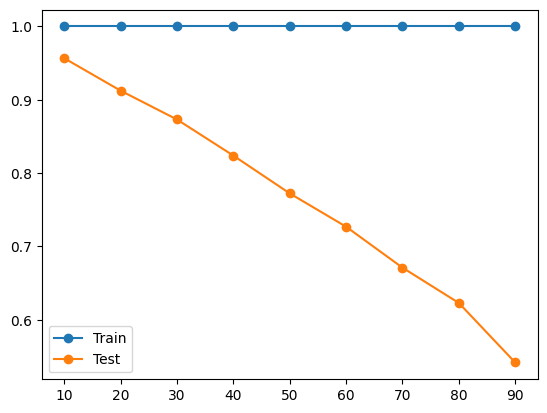

Best Classification is 10% of test data and 90% of train data:
Best Classification has 0.9566765578635015 of accuracy:


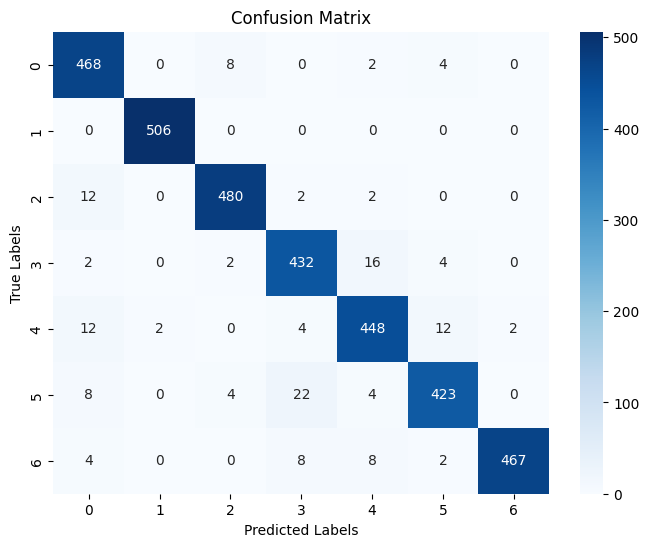

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       482
           1       1.00      1.00      1.00       506
           2       0.97      0.97      0.97       496
           3       0.92      0.95      0.94       456
           4       0.93      0.93      0.93       480
           5       0.95      0.92      0.93       461
           6       1.00      0.96      0.97       489

    accuracy                           0.96      3370
   macro avg       0.96      0.96      0.96      3370
weighted avg       0.96      0.96      0.96      3370



In [38]:
k_values = range(1, 10)  # Vary the value of k from 1 to 9
best_accuracy_differentK = []

best_accuracy = 0
best_split = 0
train_scores = []
test_scores = []
for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=i/100, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors = 1) #n_neighbors = k
    knn.fit(X_train,y_train)

#         print("test size percentage %d" % (i))
    train_accuracy = knn.score(X_train, y_train)
    test_accuracy = knn.score(X_test, y_test)
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

#         print("k={}NN Accuracy on Train Data: {}".format(3,knn.score(X_train,y_train)))
#         print("k={}NN Accuracy on Test Data: {}".format(3,knn.score(X_test,y_test)))

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_split = i

        # Make predictions on the test set
        y_pred = knn.predict(X_test)

        # Create classification report
        cr = classification_report(y_test, y_pred)
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)
# print("The Best Classification in {}NN is {}% of test data and {}% of train data,and the accuracy is {}".format(k,best_split,100-best_split,best_accuracy))
best_accuracy_differentK.append(best_accuracy)
 
plt.plot(ratiovalues, train_scores, '-o', label='Train')
plt.plot(ratiovalues, test_scores, '-o', label='Test')
plt.legend()
plt.show()

print("Best Classification is {}% of test data and {}% of train data:".format(best_split,100-best_split))
print("Best Classification has {} of accuracy:".format(best_accuracy))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report:\n", cr)

## **DNN Deep learning**

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random
import tensorflow as tf

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 32)                512       
                                                                 
 dense_61 (Dense)            (None, 64)                2112      
                                                                 
 dense_62 (Dense)            (None, 128)               8320      
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 dense_65 (Dense)            (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

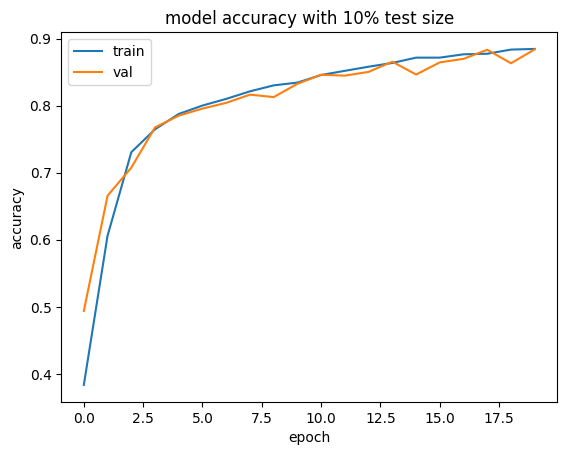

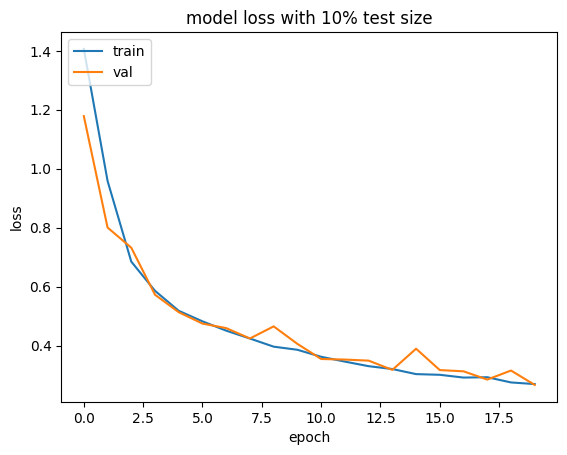

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 32)                512       
                                                                 
 dense_67 (Dense)            (None, 64)                2112      
                                                                 
 dense_68 (Dense)            (None, 128)               8320      
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 dense_71 (Dense)            (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

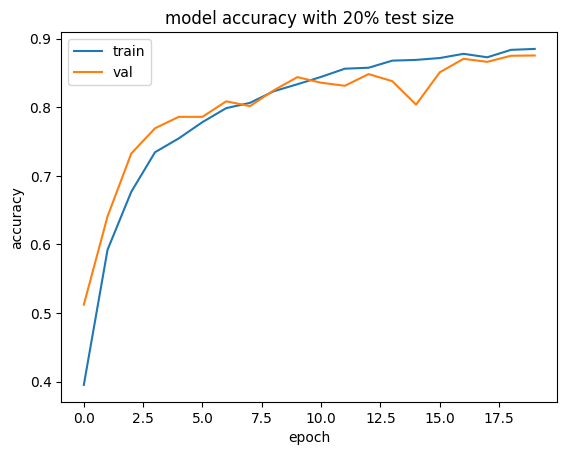

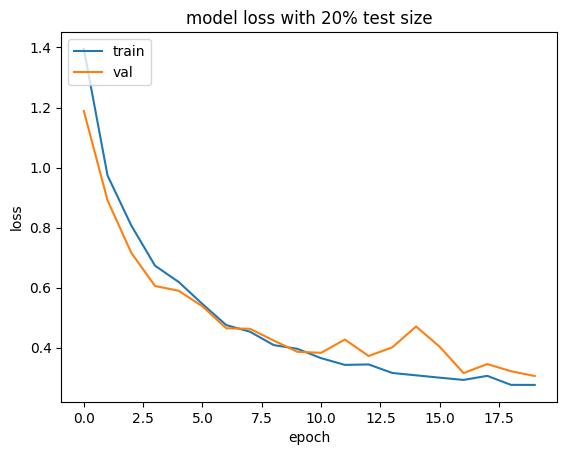

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 32)                512       
                                                                 
 dense_73 (Dense)            (None, 64)                2112      
                                                                 
 dense_74 (Dense)            (None, 128)               8320      
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 dense_77 (Dense)            (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

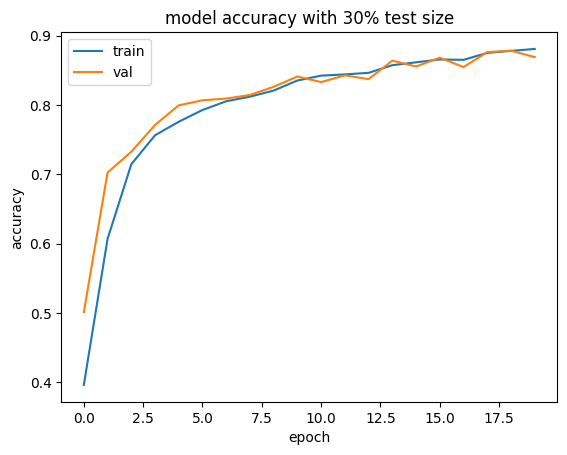

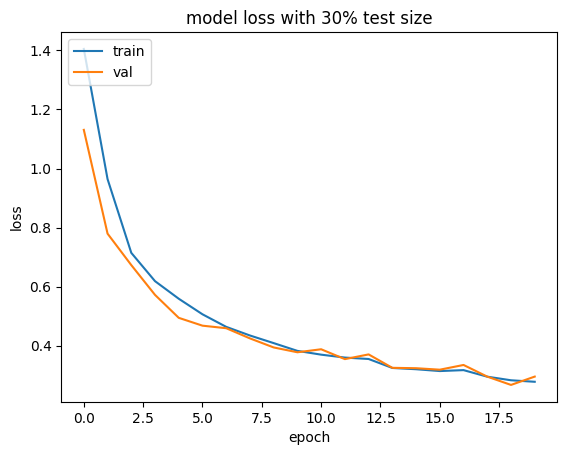

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 32)                512       
                                                                 
 dense_79 (Dense)            (None, 64)                2112      
                                                                 
 dense_80 (Dense)            (None, 128)               8320      
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dense_82 (Dense)            (None, 32)                2080      
                                                                 
 dense_83 (Dense)            (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

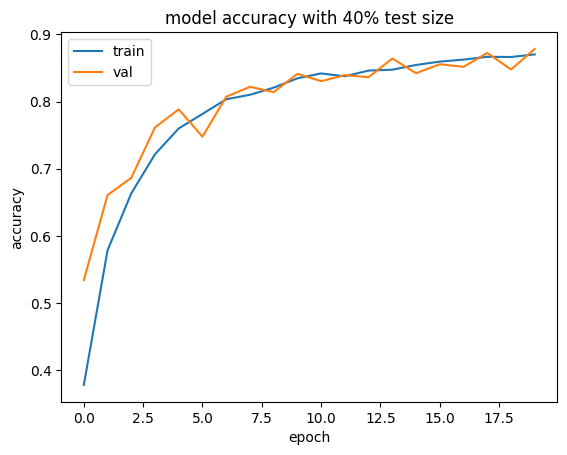

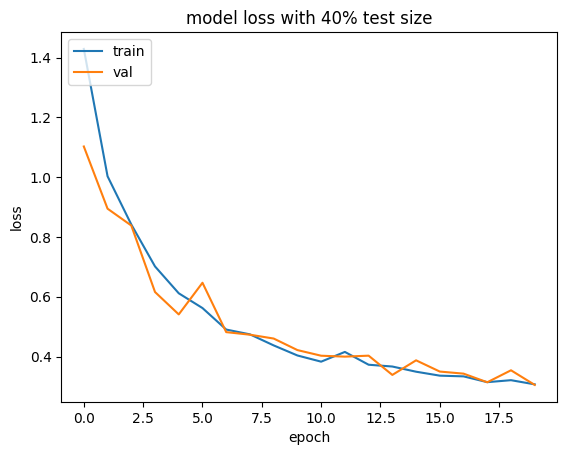

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 32)                512       
                                                                 
 dense_85 (Dense)            (None, 64)                2112      
                                                                 
 dense_86 (Dense)            (None, 128)               8320      
                                                                 
 dense_87 (Dense)            (None, 64)                8256      
                                                                 
 dense_88 (Dense)            (None, 32)                2080      
                                                                 
 dense_89 (Dense)            (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

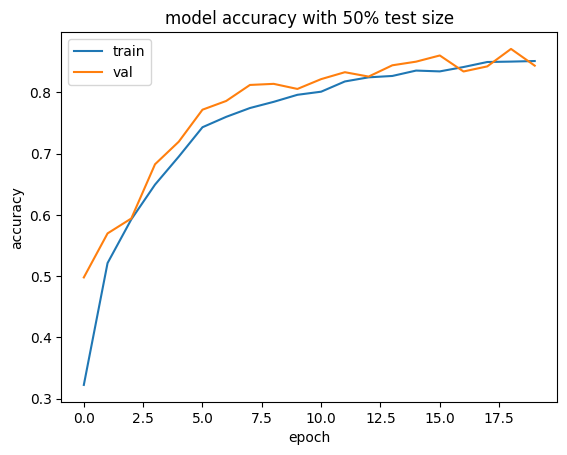

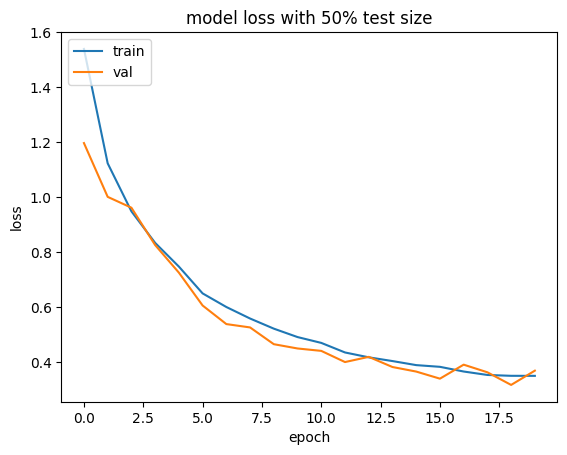

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 32)                512       
                                                                 
 dense_91 (Dense)            (None, 64)                2112      
                                                                 
 dense_92 (Dense)            (None, 128)               8320      
                                                                 
 dense_93 (Dense)            (None, 64)                8256      
                                                                 
 dense_94 (Dense)            (None, 32)                2080      
                                                                 
 dense_95 (Dense)            (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

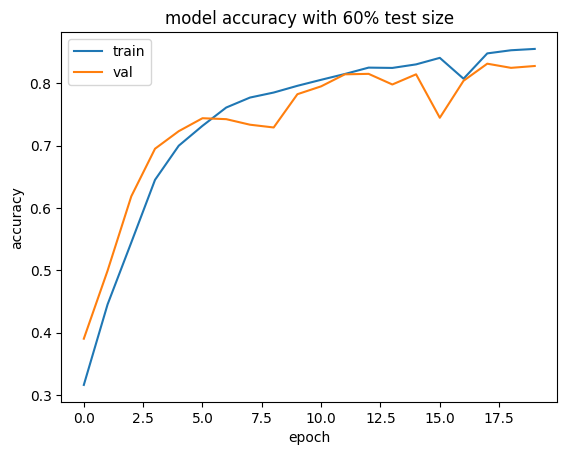

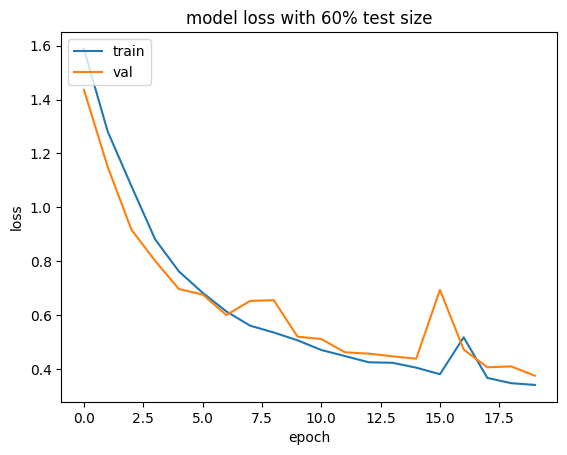

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 32)                512       
                                                                 
 dense_97 (Dense)            (None, 64)                2112      
                                                                 
 dense_98 (Dense)            (None, 128)               8320      
                                                                 
 dense_99 (Dense)            (None, 64)                8256      
                                                                 
 dense_100 (Dense)           (None, 32)                2080      
                                                                 
 dense_101 (Dense)           (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

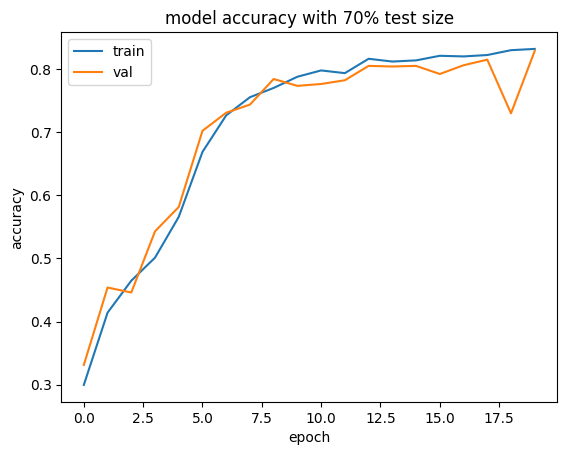

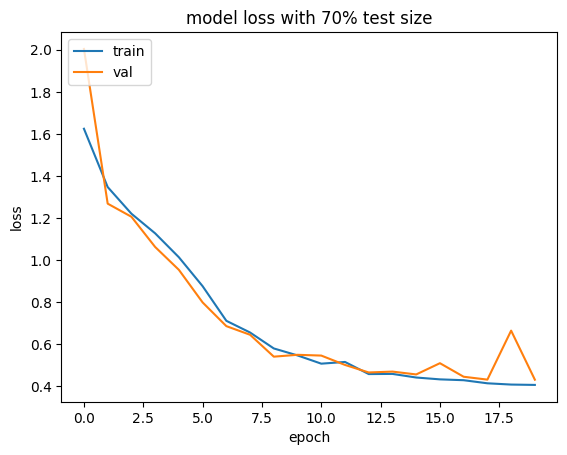

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 32)                512       
                                                                 
 dense_103 (Dense)           (None, 64)                2112      
                                                                 
 dense_104 (Dense)           (None, 128)               8320      
                                                                 
 dense_105 (Dense)           (None, 64)                8256      
                                                                 
 dense_106 (Dense)           (None, 32)                2080      
                                                                 
 dense_107 (Dense)           (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

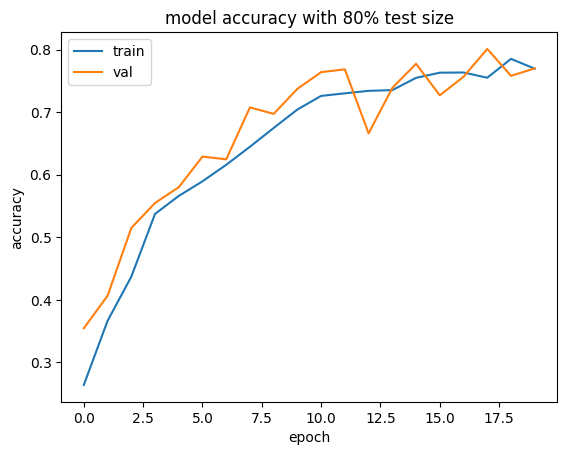

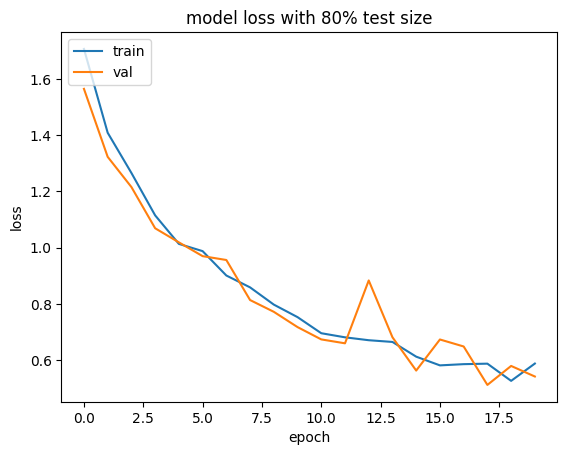

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 32)                512       
                                                                 
 dense_109 (Dense)           (None, 64)                2112      
                                                                 
 dense_110 (Dense)           (None, 128)               8320      
                                                                 
 dense_111 (Dense)           (None, 64)                8256      
                                                                 
 dense_112 (Dense)           (None, 32)                2080      
                                                                 
 dense_113 (Dense)           (None, 7)                 231       
                                                                 
Total params: 21,511
Trainable params: 21,511
Non-tra

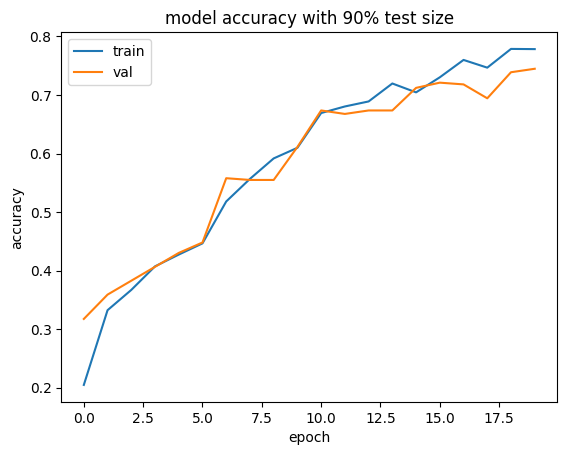

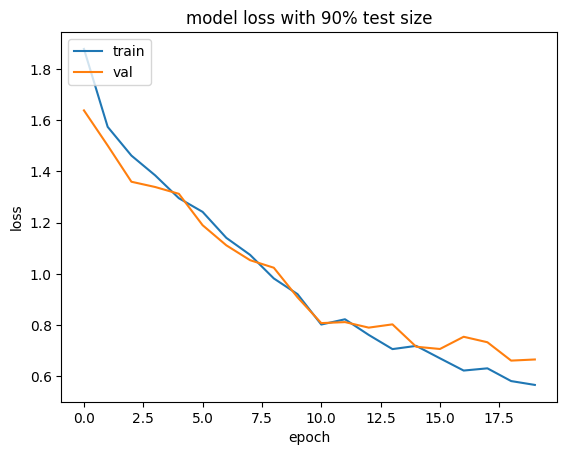

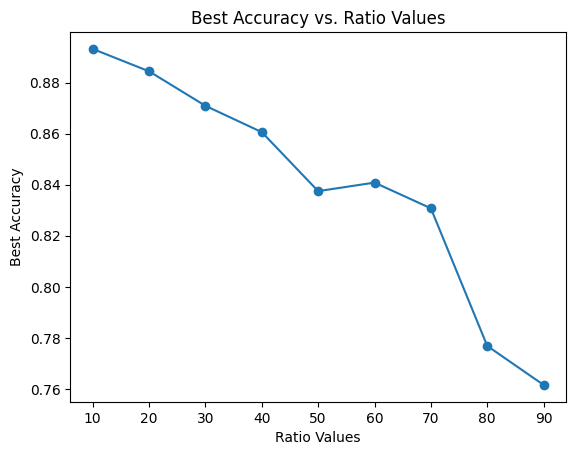

In [50]:
ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
best_accuracies = []

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

for i in ratiovalues:
    early_stop = EarlyStopping(monitor='loss', patience=2)
    model = Sequential()

    model.add(Dense(32, activation='relu', input_shape=(15,),kernel_initializer='random_uniform'))
    model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
    model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    y = LabelEncoder().fit_transform(y)
    
#     print("test size percentage %d" % (i))
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=i/100, shuffle=True)
    hist = model.fit(X_train , y_train , epochs=20, validation_split=0.1)

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy with {}% test size'.format(i))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss with {}% test size'.format(i))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
              
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]  # Evaluate test accuracy
    best_accuracies.append(test_accuracy)  # Store the best accuracy for the current ratio value

# Plot the best accuracy for each ratio value
plt.plot(ratiovalues, best_accuracies, marker='o')
plt.title('Best Accuracy vs. Ratio Values')
plt.xlabel('Ratio Values')
plt.ylabel('Best Accuracy')
plt.show()              


In [51]:
print(best_accuracies)

[0.8931750655174255, 0.8844042420387268, 0.8708943128585815, 0.8605875968933105, 0.8374784588813782, 0.8408191800117493, 0.8307470679283142, 0.7768502831459045, 0.7615749835968018]
